# NOTEBOOK FOR ANALYSIS OF OULAD DATA

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis"))

import src.plots as P
import src.stat_tests as S

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\oulad dropout analysis\data\processed_data\processed_oulad_data.csv")

In [ ]:
cat_cols = data.select_dtypes(include='object').columns.values.tolist()
num_cols = data.select_dtypes(include='number').columns.values.tolist()

In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code_module               32593 non-null  object 
 1   code_presentation         32593 non-null  object 
 2   gender                    32593 non-null  object 
 3   region                    32593 non-null  object 
 4   highest_education         32593 non-null  object 
 5   imd_band                  31482 non-null  object 
 6   age_band                  32593 non-null  object 
 7   num_of_prev_attempts      32593 non-null  int64  
 8   studied_credits           32593 non-null  int64  
 9   disability                32593 non-null  object 
 10  final_result              32593 non-null  object 
 11  date_registration         32593 non-null  float64
 12  date_unregistration       10072 non-null  float64
 13  total_vle_used            32593 non-null  float64
 14  total_

In [5]:
data.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,55.0,934.0,5.0,5.0,0.0,82.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,84.0,1435.0,5.0,5.0,0.0,66.4
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,22.0,281.0,0.0,0.0,0.0,0.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,82.0,2158.0,5.0,5.0,0.0,76.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,66.0,1034.0,5.0,5.0,0.0,54.4


In [6]:
data[['total_assessments','attempted_assessment','non_attempted_assessment']]= data[['total_assessments','attempted_assessment','non_attempted_assessment']].astype('Int64')

In [7]:
data.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,55.0,934.0,5,5,0,82.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,84.0,1435.0,5,5,0,66.4
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,22.0,281.0,0,0,0,0.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,82.0,2158.0,5,5,0,76.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,66.0,1034.0,5,5,0,54.4


In [8]:
data.describe().round(2)

,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
count,32593.00,32593.00,32593.00,10072.00,32593.00,32593.00,32593.0,32593.0,32593.0,32593.00
mean,0.16,79.76,-69.39,49.76,60.15,1215.14,5.34,5.28,0.06,57.65
std,0.48,41.07,49.23,82.46,55.90,1692.60,4.33,4.34,0.53,32.93
min,0.00,30.00,-322.00,-365.00,0.00,0.00,0.0,0.0,0.0,0.00
25%,0.00,60.00,-100.00,-2.00,19.00,142.00,1.0,1.0,0.0,43.00
50%,0.00,60.00,-57.00,27.00,46.00,602.00,5.0,5.0,0.0,70.57
75%,0.00,120.00,-29.00,109.00,86.00,1585.00,9.0,9.0,0.0,82.40
max,6.00,655.00,167.00,444.00,413.00,24139.00,14.0,14.0,12.0,100.00


### Statistical Insight from numerical columns

In [9]:

data.describe(include='object')

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,31482,32593,32593,32593
unique,7,4,2,13,5,10,3,2,4
top,BBB,2014J,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,17875,3446,14045,3654,22944,29429,12361


### Statistical insight from categorical column

In [10]:

data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,num_of_prev_attempts,7
1,studied_credits,61
2,date_registration,332
3,date_unregistration,416
4,total_vle_used,325
5,total_clicks,5381
6,total_assessments,15
7,attempted_assessment,15
8,non_attempted_assessment,13
9,average_score,2601


In [ ]:
data.select_dtypes(include='number').columns

Index(['num_of_prev_attempts', 'studied_credits', 'date_registration',
       'date_unregistration', 'total_vle_used', 'total_clicks',
       'total_assessments', 'attempted_assessment', 'non_attempted_assessment',
       'average_score'],
      dtype='object')

In [ ]:

data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,code_module,7
1,code_presentation,4
2,gender,2
3,region,13
4,highest_education,5
5,imd_band,10
6,age_band,3
7,disability,2
8,final_result,4


In [ ]:
small_cat_cols = ['code_module', 'code_presentation', 'gender',
       'highest_education', 'imd_band', 'age_band', 'disability','num_of_prev_attempts']

In [ ]:
large_num_cols = [ 'studied_credits', 'date_registration',
       'date_unregistration', 'total_vle_used', 'total_clicks','total_assessments', 'attempted_assessment', 'non_attempted_assessment',
       'average_score']

In [ ]:
large_cat_cols = ['region']

In [ ]:
target_col = ['final_result']

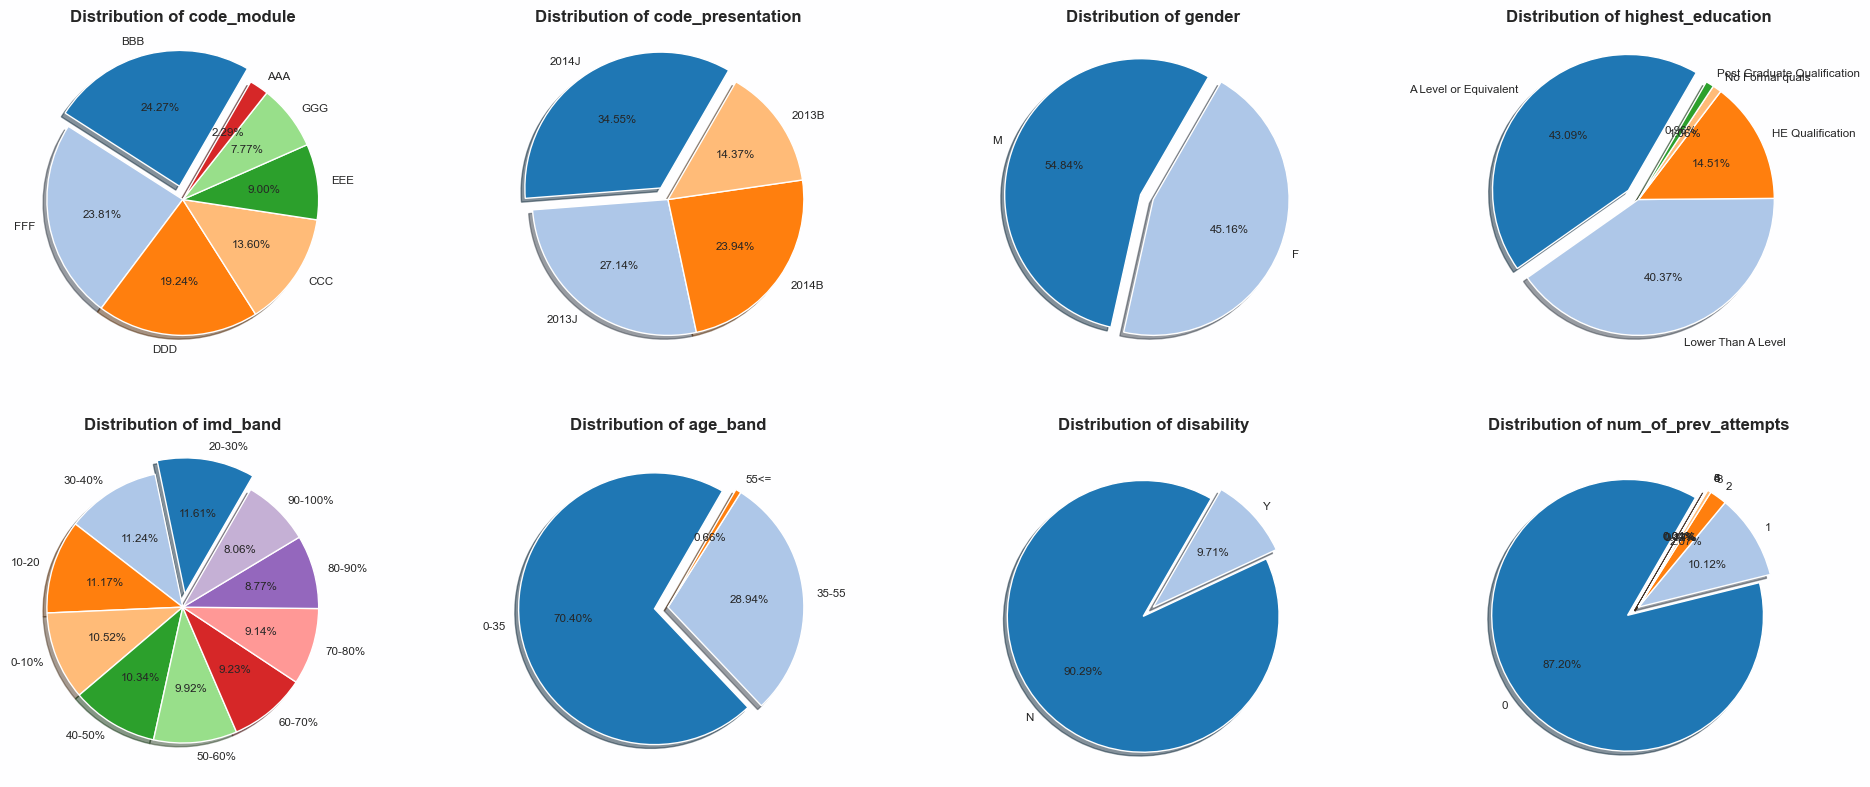

In [17]:
fig = plt.figure(figsize=(24,15))
limit = len(small_cat_cols)
for i,column in enumerate(small_cat_cols):
    if i> limit:
        break
    plt.subplot(3,4,i+1)
    P.plot_pie(column=column,data=data)

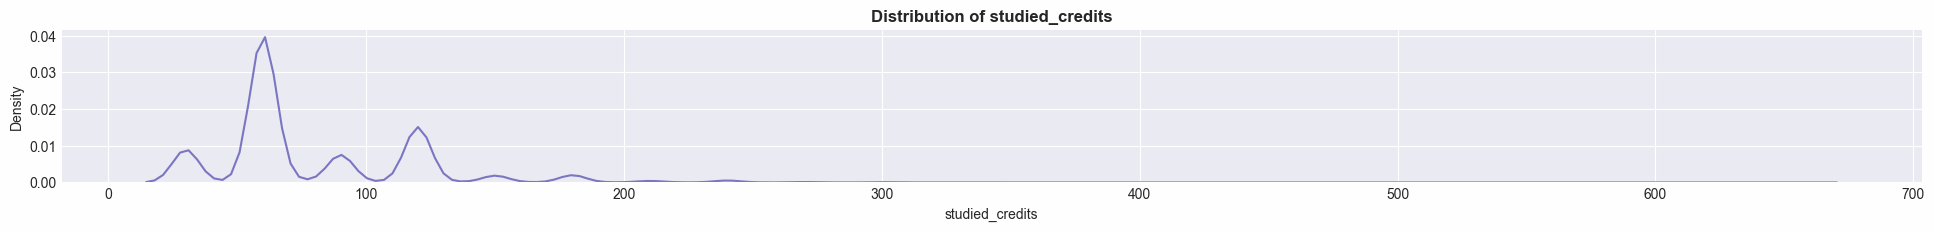

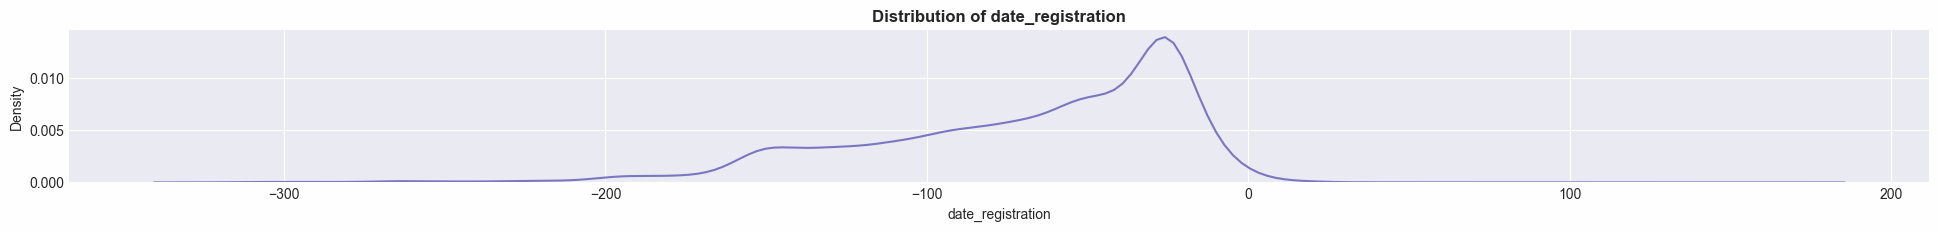

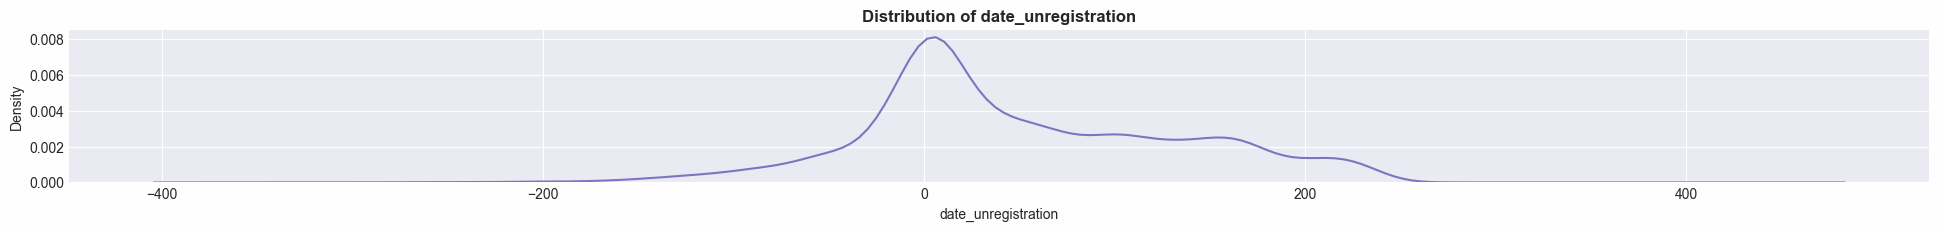

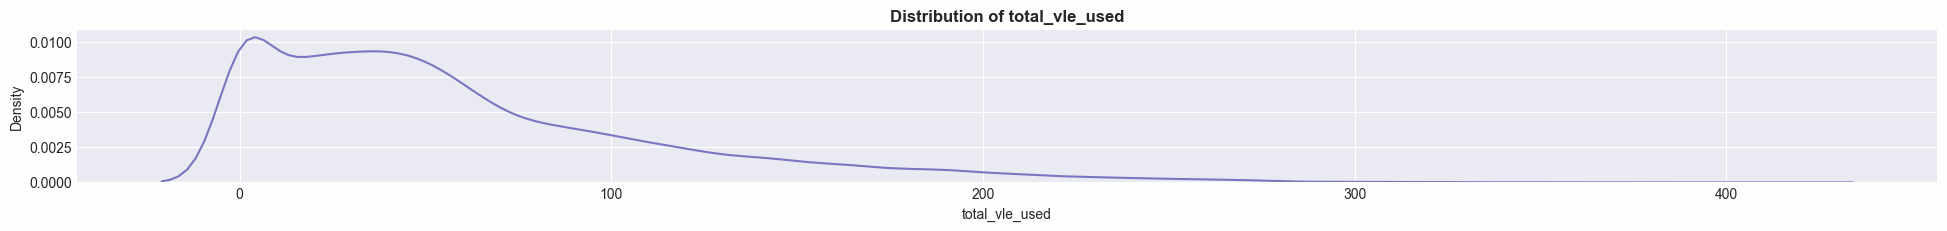

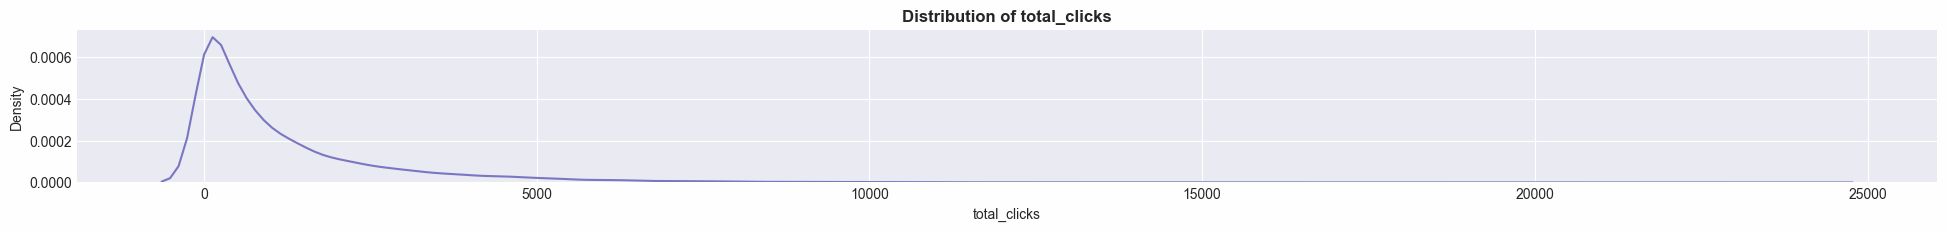

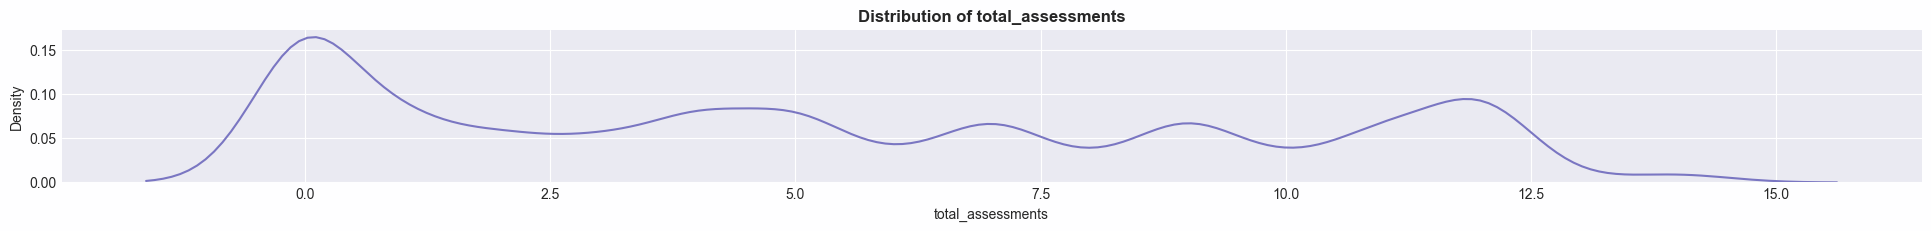

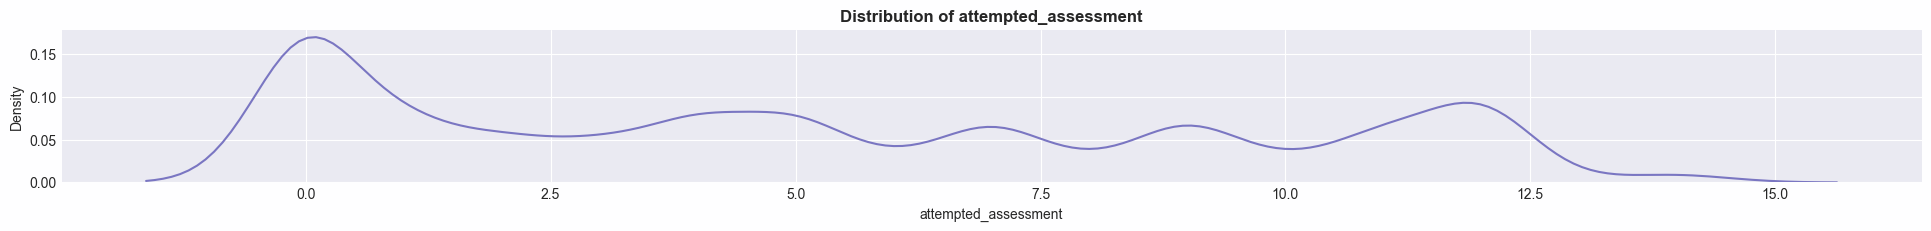

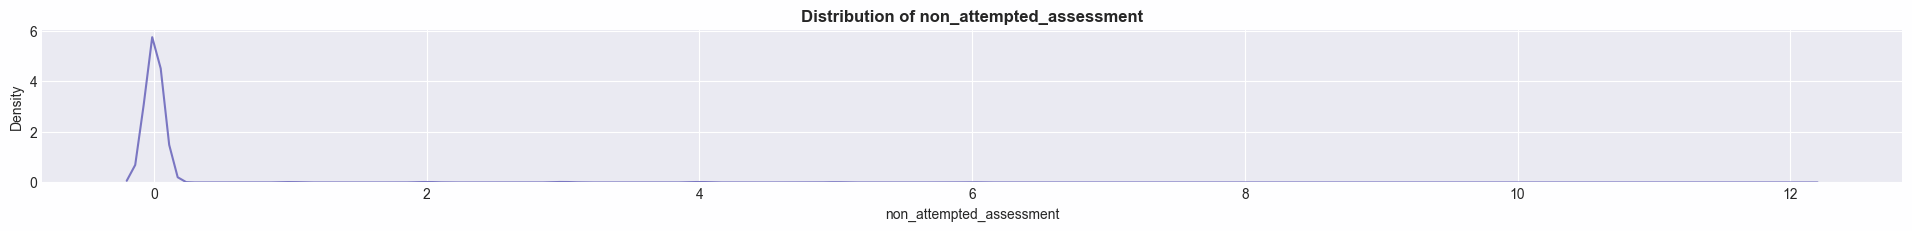

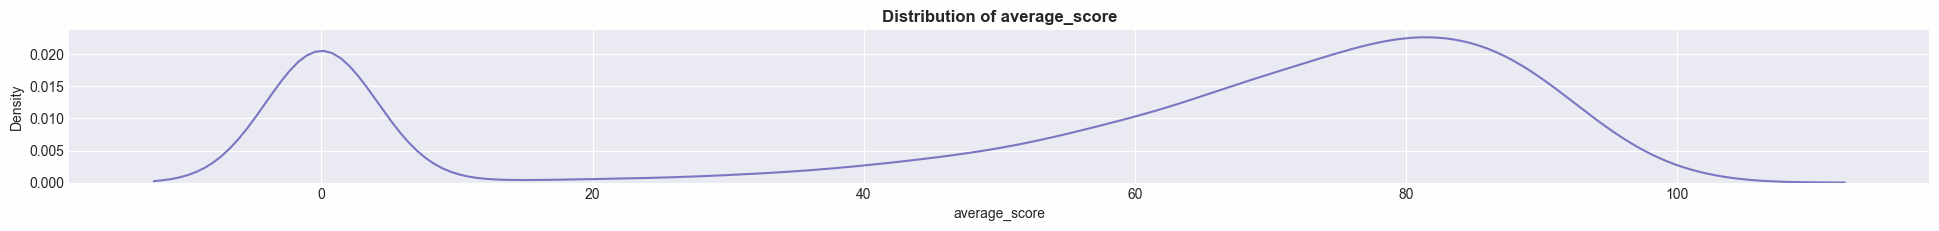

In [18]:
limit = len(large_num_cols)
for i,column in enumerate(large_num_cols):
    if i> limit:
        break
    fig = plt.figure(figsize=(24,21))
    plt.subplot(9,1,i+1)
    P.plot_kde(column=column,data=data)
    plt.show()

Findings of columns based on univariate analysis
Categorical Columns

BBB and FFF have the most occurances in course_module column and AAA have the least occurances

2014J have the most occurance in code_presentation column

M have slighly more occurances than F in gender column

region column is divided into 13 classes and scotland occured most of the times

highest_education column have 5 unique values and post graduation and no formal eduation occurs least of the time

imd_band column is distributed almost equally in all classes, having 3.41% of occurances as unknown

0-35 age band have the highest occurance in age_band column with least occurance of 55+ age bands

more than 90% of occurances have N in disability column

31% of occurances are withdrawn in the final result column

Numerical Columns

most of the values of number_of_previous_attempts column is around 0

studied_credit column is skewed towards right with most values around the median

date_registration column have a peak before 0

date_unregistration column vales peaks around 0

total_vle_used column is skewed towrds the bigger side

total_clicks column is heavily skewed to the bigger side with more values near 0

total_assessment column is someway uniformly distributed with more values around 0

attempted_assessment follows same distribution as total_assessment

non_attempted_assessment is skewed towards right with more values around 0

average_score have 2 peaks one at bigger end and one at 0

In [19]:

for cols in large_cat_cols:
    df = data[cols].value_counts(normalize=True).mul(100).round(2).reset_index(name = r"% of observations").sort_values(by ="% of observations", ascending = False ).head(10)
    display(df)
    display("_"*50)

,region,% of observations
0,Scotland,10.57
1,East Anglian Region,10.25
2,London Region,9.87
3,South Region,9.49
4,North Western Region,8.92
5,West Midlands Region,7.92
6,South West Region,7.47
7,East Midlands Region,7.26
8,South East Region,6.48
9,Wales,6.40


'__________________________________________________'

Insights from univariate analysis of large categorical columns

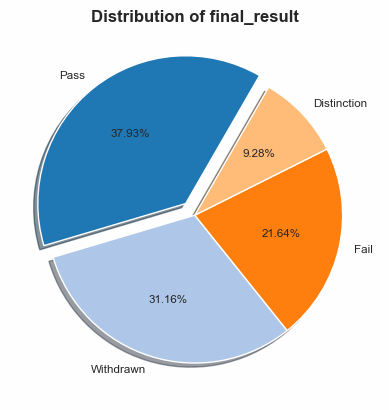

In [20]:
P.plot_pie('final_result',data=data)


Insight from univariate analysis of target column

***

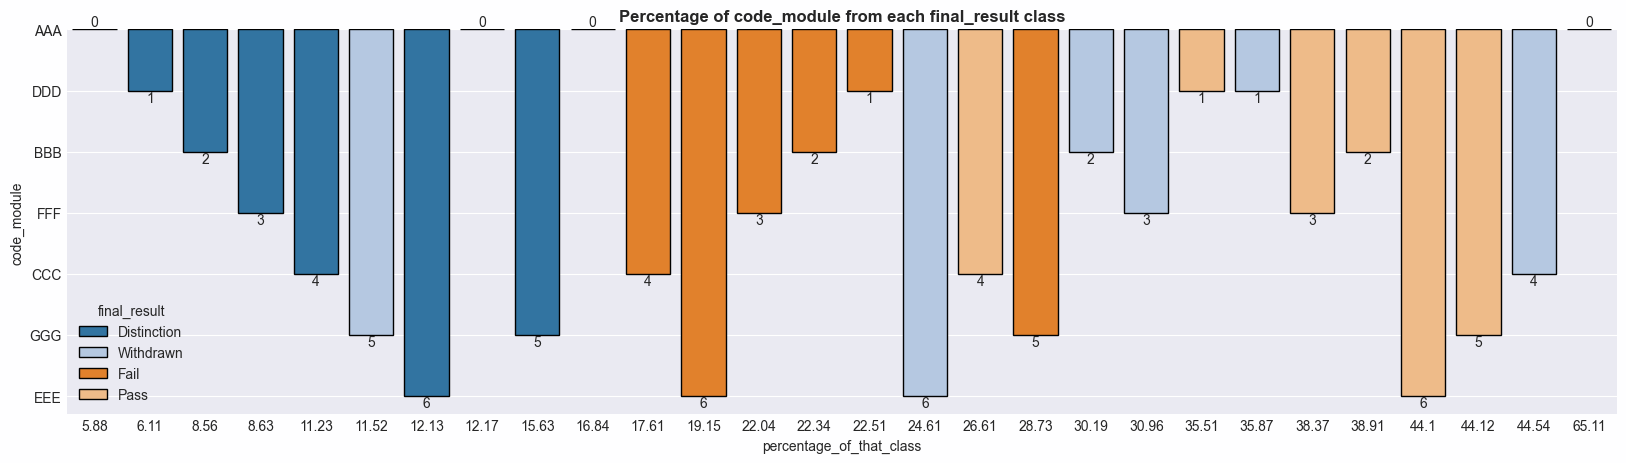

In [25]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='code_module',data=data,target='final_result',orient='v')